<a href="https://colab.research.google.com/github/jack0928/computer-vision-fundamentals/blob/main/06_unet_segmentation_oxford_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6709 - loss: 1.4100

207/207 ━━━━━━━━━━━━━━━━━━━━ 61s 174ms/step - accuracy: 0.6711 - loss: 1.4072 - val_accuracy: 0.5854 - val_loss: 4.6109
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7766 - loss: 0.5529

207/207 ━━━━━━━━━━━━━━━━━━━━ 32s 153ms/step - accuracy: 0.7767 - loss: 0.5528 - val_accuracy: 0.5854 - val_loss: 4.0959
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8113 - loss: 0.4733

207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - accuracy: 0.8113 - loss: 0.4733 - val_accuracy: 0.7675 - val_loss: 0.5845
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8328 - loss: 0.4195

207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 147ms/step - accuracy: 0.8328 - loss: 0.4195 - val_accuracy: 0.8193 - val_loss: 0.4537
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8466 - loss: 0.3891

207/207 ━━━━━━━━━━━━━━━━━━━━ 33s 160ms/step - accuracy: 0.8466 - loss: 0.3891 - val_accuracy: 0.8335 - val_loss: 0.4180
Epoch 6/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8621 - loss: 0.3470

207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - accuracy: 0.8621 - loss: 0.3470 - val_accuracy: 0.8426 - val_loss: 0.3975
Epoch 7/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - accuracy: 0.8704 - loss: 0.3247 - val_accuracy: 0.8342 - val_loss: 0.4200
Epoch 8/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8811 - loss: 0.2985

207/207 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.8811 - loss: 0.2985 - val_accuracy: 0.8501 - val_loss: 0.3875
Epoch 9/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8870 - loss: 0.2832

207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - accuracy: 0.8870 - loss: 0.2832 - val_accuracy: 0.8552 - val_loss: 0.3727
Epoch 10/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 30s 146ms/step - accuracy: 0.8951 - loss: 0.2619 - val_accuracy: 0.8547 - val_loss: 0.3966
Epoch 11/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - accuracy: 0.9028 - loss: 0.2402 - val_accuracy: 0.8486 - val_loss: 0.4178
Epoch 12/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 30s 146ms/step - accuracy: 0.9068 - loss: 0.2300 - val_accuracy: 0.8411 - val_loss: 0.4394
Epoch 13/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - accuracy: 0.9080 - loss: 0.2263 - val_accuracy: 0.8556 - val_loss: 0.4248
Epoch 14/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 30s 146ms/step - accuracy: 0.9146 - loss: 0.2091 - val_accuracy: 0.8272 - val_loss: 0.5381
Epoch 15/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 147ms/step - accuracy: 0.9186 - loss: 0.1987 - val_accuracy: 0.8559 - val_loss: 0.4308
Epoch 16/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 33s 158ms/step - accuracy: 0.9199 - loss: 0.195

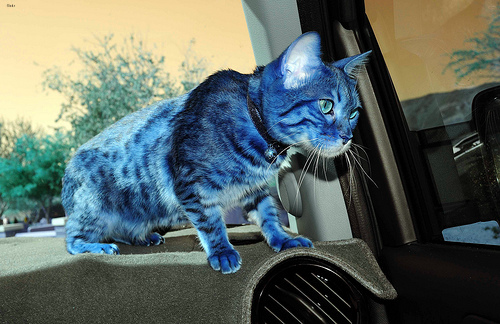

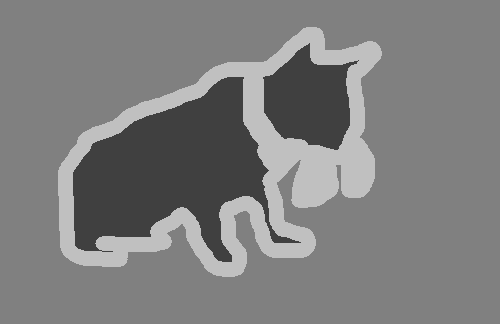

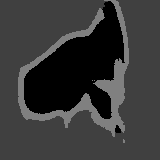

In [2]:
# =========================================
# 1. 라이브러리 불러오기
# =========================================
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import os, random
import cv2 as cv
from google.colab.patches import cv2_imshow


# =========================================
# 데이터셋 다운로드 및 압축 해제
# =========================================
# 필요한 경우에만 실행 (예: 코랩 환경에서 데이터셋이 없는 경우)
if not os.path.exists('./datasets/oxford_pets/images'):
    print("Downloading Oxford-IIIT Pet Dataset...")
    !mkdir -p ./datasets/oxford_pets
    !wget -P ./datasets/oxford_pets https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
    !wget -P ./datasets/oxford_pets https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
    !tar -xf ./datasets/oxford_pets/images.tar.gz -C ./datasets/oxford_pets/
    !tar -xf ./datasets/oxford_pets/annotations.tar.gz -C ./datasets/oxford_pets/
    print("Download and extraction complete.")


# =========================================
# 2. 데이터셋 경로 및 설정
# =========================================
# 입력 이미지 (반려동물 사진)
# Corrected path: removed redundant 'images/'
input_dir = './datasets/oxford_pets/images/'

# 정답 마스크 (물체 / 배경 / 경계)
# Corrected path: removed redundant 'annotations/'
target_dir = './datasets/oxford_pets/annotations/trimaps/'

# 모델 입력 이미지 크기
img_size = (160, 160)

# 분할 클래스 수
# 1: 물체, 2: 배경, 3: 경계  →  (학습 시 0,1,2로 변환)
num_classes = 3

# 미니배치 크기
batch_size = 32


# =========================================
# 3. 이미지 / 라벨 파일 경로 수집
# =========================================
img_paths = sorted([
    os.path.join(input_dir, f)
    for f in os.listdir(input_dir)
    if f.endswith(".jpg")
])

label_paths = sorted([
    os.path.join(target_dir, f)
    for f in os.listdir(target_dir)
    if f.endswith(".png") and not f.startswith(".")
])


# =========================================
# 4. 데이터 제너레이터 클래스
#    (배치 단위로 이미지와 라벨을 읽어옴)
# =========================================
class OxfordPets(keras.utils.Sequence):

    def __init__(self, batch_size, img_size, img_paths, label_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.img_paths = img_paths
        self.label_paths = label_paths

    # 한 epoch당 배치 개수
    def __len__(self):
        return len(self.label_paths) // self.batch_size

    # idx번째 배치 데이터 반환
    def __getitem__(self, idx):
        i = idx * self.batch_size

        batch_img_paths = self.img_paths[i:i + self.batch_size]
        batch_label_paths = self.label_paths[i:i + self.batch_size]

        # 입력 이미지 (RGB)
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")

        for j, path in enumerate(batch_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img

        # 정답 마스크 (grayscale)
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")

        for j, path in enumerate(batch_label_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            y[j] -= 1   # 클래스 값을 1,2,3 → 0,1,2로 변환

        return x, y


# =========================================
# 5. U-Net 모델 정의
# =========================================
def make_model(img_size, num_classes):

    inputs = keras.Input(shape=img_size + (3,))

    # -------- Down Sampling (Encoder) --------
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # 잔차 연결용

    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Residual connection
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    # -------- Up Sampling (Decoder) --------
    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)

        x = layers.add([x, residual])
        previous_block_activation = x

    # -------- 출력층 --------
    outputs = layers.Conv2D(
        num_classes, 3, activation="softmax", padding="same"
    )(x)

    return keras.Model(inputs, outputs)


# =========================================
# 6. 모델 생성
# =========================================
model = make_model(img_size, num_classes)


# =========================================
# 7. 학습 / 검증 데이터 분리
# =========================================
random.Random(1).shuffle(img_paths)
random.Random(1).shuffle(label_paths)

num_test = int(len(img_paths) * 0.1)

train_img_paths = img_paths[:-num_test]
train_label_paths = label_paths[:-num_test]

test_img_paths = img_paths[-num_test:]
test_label_paths = label_paths[-num_test:]


train_gen = OxfordPets(batch_size, img_size, train_img_paths, train_label_paths)
test_gen = OxfordPets(batch_size, img_size, test_img_paths, test_label_paths)


# =========================================
# 8. 컴파일 & 체크포인트 설정
# =========================================
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 가장 성능 좋은 모델만 저장
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "oxford_seg_best.h5",
        save_best_only=True
    )
]


# =========================================
# 9. 모델 학습
# =========================================
model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen,
    callbacks=callbacks
)


# =========================================
# 10. 예측 및 결과 시각화
# =========================================
preds = model.predict(test_gen)

# 샘플 하나 확인 (index 0의 이미지)
# 입력 이미지 로드 및 BGR to RGB 변환 (matplotlib용)
input_image = cv.imread(test_img_paths[0])
input_image_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)

# 정답 마스크 로드 (grayscale) 및 스케일 조정
ground_truth_mask = cv.imread(test_label_paths[0], cv.IMREAD_GRAYSCALE)
# 원본 코드와 유사하게 1,2,3을 스케일링하여 시각화
ground_truth_mask_scaled = ground_truth_mask * 64

# 예측 마스크 처리: 확률 맵에서 가장 높은 확률의 클래스 인덱스를 추출 (0, 1, 2)
predicted_mask = np.argmax(preds[0], axis=-1)
# 정답 마스크와 유사하게 스케일링하여 시각화
predicted_mask_scaled = predicted_mask * 64


# cv2_imshow를 사용하여 이미지 표시
cv2_imshow(input_image_rgb)
cv2_imshow(ground_truth_mask_scaled)
cv2_imshow(predicted_mask_scaled)
